In [1]:
import numpy as np
import pandas as pd
import folium

In [2]:
import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [3]:
data = pd.read_excel("ethnic-groups-by-borough.xls", sheet_name='2018', skiprows=1)

In [4]:
data.head()

,Unnamed: 0,Unnamed: 1,White,Asian,Black,Mixed/ Other,Total,Unnamed: 7,White.1,Asian.1,Black.1,Mixed/ Other.1,Total.1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E09000001,City of London,-,-,-,-,9000.0,NaN,-,-,-,-,6000.0
2,E09000002,Barking and Dagenham,109000,54000,36000,15000,215000.0,NaN,11000,8000,6000,4000,15000.0
3,E09000003,Barnet,250000,57000,30000,54000,390000.0,NaN,22000,10000,7000,10000,27000.0
4,E09000004,Bexley,195000,17000,21000,15000,248000.0,NaN,15000,5000,5000,4000,17000.0


In [5]:
df = data[['Unnamed: 1','White','Asian','Black','Mixed/ Other','Total']]

In [6]:
df.head()

,Unnamed: 1,White,Asian,Black,Mixed/ Other,Total
0,NaN,NaN,NaN,NaN,NaN,NaN
1,City of London,-,-,-,-,9000.0
2,Barking and Dagenham,109000,54000,36000,15000,215000.0
3,Barnet,250000,57000,30000,54000,390000.0
4,Bexley,195000,17000,21000,15000,248000.0


In [7]:
df = df.iloc[2:34,]

In [8]:
df.head()

,Unnamed: 1,White,Asian,Black,Mixed/ Other,Total
2,Barking and Dagenham,109000,54000,36000,15000,215000.0
3,Barnet,250000,57000,30000,54000,390000.0
4,Bexley,195000,17000,21000,15000,248000.0
5,Brent,102000,107000,62000,56000,328000.0
6,Bromley,267000,15000,21000,28000,330000.0


In [9]:
df_london = df[['Unnamed: 1','White','Asian','Black','Mixed/ Other','Total']]

In [10]:
df_london.columns = ['Neighborhood','White','Asian_Population','Black','Mixed','Total_Population']

In [11]:
df_london.index = range(len(df_london))

In [12]:
df_london.head()

,Neighborhood,White,Asian_Population,Black,Mixed,Total_Population
0,Barking and Dagenham,109000,54000,36000,15000,215000.0
1,Barnet,250000,57000,30000,54000,390000.0
2,Bexley,195000,17000,21000,15000,248000.0
3,Brent,102000,107000,62000,56000,328000.0
4,Bromley,267000,15000,21000,28000,330000.0


In [13]:
df_london.tail()

,Neighborhood,White,Asian_Population,Black,Mixed,Total_Population
27,Sutton,147000,36000,11000,10000,204000.0
28,Tower Hamlets,145000,128000,22000,19000,314000.0
29,Waltham Forest,142000,44000,43000,48000,277000.0
30,Wandsworth,242000,19000,39000,23000,323000.0
31,Westminster,140000,33000,17000,51000,241000.0


In [14]:
Area = list(df_london["Neighborhood"])
l = len(Area)

In [15]:
latitudes = []
longitudes = []

for i in range(l):
    locality = Area[i]
    address = locality + ', London'

    geolocator = Nominatim(user_agent="london_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    latitudes.append(latitude)
    longitudes.append(longitude)
    
    #print('The geograpical coordinate of Toronto, Canada are {}, {}.'.format(latitude, longitude))
print(latitudes)
print(longitudes)

[51.5541171, 51.65309, 51.4416793, 51.563825800000004, 51.4028046, 51.5423045, 51.3713049, 51.5126553, 51.6520851, 51.4820845, 51.5432402, 51.4920377, 51.6014893, 51.5967688, 51.5443687, 51.542519299999995, 51.4686132, 51.5384287, 51.4989948, 51.4096275, 51.5013012, 51.4624325, 51.410802849999996, 51.52999955, 51.5763203, 51.44037225, 51.5029222, 51.3575114, 51.5256294, 51.59816935, 51.4570271, 51.5004439]
[0.15050434261994267, -0.2002261, 0.150488, -0.2757596561855699, 0.0148142, -0.1395604, -0.101957, -0.3051952, -0.0810175, -0.0045417, -0.0493621, -0.2236401, -0.1116958, -0.33727515543507014, -0.1443031798919795, -0.44833493117949663, -0.3613471, -0.0999051, -0.1991229, -0.3062621, -0.117287, -0.0101331, -0.18809850595572736, 0.02931796029382208, 0.0454097, -0.3057195504470487, -0.103458, -0.173640122600872, -0.0335853, -0.01783667461048707, -0.1932607, -0.1265398]


In [16]:
df_london.insert(loc = 6,column='latitudes', value=latitudes)
df_london.insert(loc = 7,column='longitudes', value=longitudes)

In [17]:
df_london.head()

,Neighborhood,White,Asian_Population,Black,Mixed,Total_Population,latitudes,longitudes
0,Barking and Dagenham,109000,54000,36000,15000,215000.0,51.554117,0.150504
1,Barnet,250000,57000,30000,54000,390000.0,51.653090,-0.200226
2,Bexley,195000,17000,21000,15000,248000.0,51.441679,0.150488
3,Brent,102000,107000,62000,56000,328000.0,51.563826,-0.275760
4,Bromley,267000,15000,21000,28000,330000.0,51.402805,0.014814


In [18]:
df_london.to_csv('df_london.csv')

In [19]:
address = 'London, England'

geolocator = Nominatim(user_agent="london_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London, England are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London, England are 51.5073219, -0.1276474.


#### Plotting Total Population in Neighbourhood

In [20]:
map_london = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, borough, r in zip(df_london['latitudes'], df_london['longitudes'], 
                                           df_london['Neighborhood'],df_london['Total_Population']):
    label = borough
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=r/22000,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

In [21]:
CLIENT_ID = '4UNV55N314Z4QZPSQWEYEACVJISYCCDEIVFKKF4WZU53HAU4' # your Foursquare ID
CLIENT_SECRET = 'AZVSZ3T3JELVJBWDJU051NO5K5N1EY5BUCCOBDBRUNXARL1A' # your Foursquare Secret
VERSION = '20200629' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4UNV55N314Z4QZPSQWEYEACVJISYCCDEIVFKKF4WZU53HAU4
CLIENT_SECRET:AZVSZ3T3JELVJBWDJU051NO5K5N1EY5BUCCOBDBRUNXARL1A


In [22]:
import requests

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
LIMIT = 100

In [25]:
london_venues = getNearbyVenues(names=df_london['Neighborhood'],
                                   latitudes=df_london['latitudes'],
                                   longitudes=df_london['longitudes']
                                  )

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [26]:
print(london_venues.shape)

(1997, 7)


In [27]:
#### All Venues in London Neighbourhood

In [28]:
london_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.554117,0.150504,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.554117,0.150504,Iceland,51.560578,0.147685,Grocery Store
2,Barking and Dagenham,51.554117,0.150504,BP,51.549951,0.161963,Gas Station
3,Barking and Dagenham,51.554117,0.150504,Shell,51.560415,0.148364,Gas Station
4,Barking and Dagenham,51.554117,0.150504,Tesco Express,51.551536,0.152784,Grocery Store
5,Barking and Dagenham,51.554117,0.150504,Connor Road Bus Stop,51.554345,0.147162,Bus Stop
6,Barking and Dagenham,51.554117,0.150504,Oglethorpe Road Bus Stop,51.555221,0.147136,Bus Stop
7,Barking and Dagenham,51.554117,0.150504,Morrisons,51.559774,0.148752,Supermarket
8,Barking and Dagenham,51.554117,0.150504,Five Elms Off Licence,51.553878,0.145531,Liquor Store
9,Barking and Dagenham,51.554117,0.150504,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center


In [29]:
london_venues.tail(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1987,Westminster,51.500444,-0.12654,Great Scotland Yard Hotel,51.506425,-0.126146,Hotel
1988,Westminster,51.500444,-0.12654,Park Plaza London Waterloo,51.498241,-0.113548,Hotel
1989,Westminster,51.500444,-0.12654,Waterstones,51.507650,-0.127130,Bookstore
1990,Westminster,51.500444,-0.12654,2 Love Tea And Coffee,51.496089,-0.120823,Coffee Shop
1991,Westminster,51.500444,-0.12654,The Red Lion,51.502100,-0.125733,Pub
1992,Westminster,51.500444,-0.12654,Berry Bros & Rudd,51.505505,-0.138255,Wine Shop
1993,Westminster,51.500444,-0.12654,Executive Lounge,51.500791,-0.117195,Hotel Bar
1994,Westminster,51.500444,-0.12654,The Gym & Club at County Hall,51.502079,-0.119739,Gym
1995,Westminster,51.500444,-0.12654,Abraham Lincoln Statue,51.500555,-0.127673,Outdoor Sculpture
1996,Westminster,51.500444,-0.12654,Playhouse Theatre,51.506798,-0.123479,Theater


In [30]:
Venue_Category = list(london_venues['Venue Category'])

In [31]:
res_list = list(set(Venue_Category))

#### Function to find out all Restaurant Venues

In [32]:
# finding all Restaurant Venues
All_res = []
not_res = []
for i in range(len(res_list)):
    m = res_list[i]
    l = m.split()
    if l[-1] == 'Restaurant':
        All_res.append(m)
    else:
        not_res.append(m)

In [33]:
All_res

['Indian Restaurant',
 'Korean Restaurant',
 'Brazilian Restaurant',
 'Sri Lankan Restaurant',
 'Asian Restaurant',
 'English Restaurant',
 'Caribbean Restaurant',
 'Sushi Restaurant',
 'Japanese Restaurant',
 'Hunan Restaurant',
 'Vegetarian / Vegan Restaurant',
 'Ethiopian Restaurant',
 'Latin American Restaurant',
 'Italian Restaurant',
 'Kebab Restaurant',
 'Argentinian Restaurant',
 'Falafel Restaurant',
 'Turkish Restaurant',
 'French Restaurant',
 'Ramen Restaurant',
 'Afghan Restaurant',
 'German Restaurant',
 'Spanish Restaurant',
 'Empanada Restaurant',
 'Restaurant',
 'Greek Restaurant',
 'Persian Restaurant',
 'Thai Restaurant',
 'Vietnamese Restaurant',
 'Eastern European Restaurant',
 'Modern European Restaurant',
 'American Restaurant',
 'Polish Restaurant',
 'Mediterranean Restaurant',
 'Fast Food Restaurant',
 'Lebanese Restaurant',
 'Tapas Restaurant',
 'Southern / Soul Food Restaurant',
 'Portuguese Restaurant',
 'Malay Restaurant',
 'Austrian Restaurant',
 'Filipino

In [34]:
# Choosing Asian and identical restaurants of our choice
Asian_res = ['Asian Restaurant',
             'Malay Restaurant',
             'Vietnamese Restaurant',
             'Sri Lankan Restaurant',
             'Thai Restaurant',
             'Middle Eastern Restaurant',
             'South Indian Restaurant',
             'Chinese Restaurant',
             'Afghan Restaurant',
             'Taiwanese Restaurant',
             'Japanese Restaurant',
             'Indian Restaurant']

In [35]:
Asian_res

['Asian Restaurant',
 'Malay Restaurant',
 'Vietnamese Restaurant',
 'Sri Lankan Restaurant',
 'Thai Restaurant',
 'Middle Eastern Restaurant',
 'South Indian Restaurant',
 'Chinese Restaurant',
 'Afghan Restaurant',
 'Taiwanese Restaurant',
 'Japanese Restaurant',
 'Indian Restaurant']

## Onehot Coding all Venues

In [36]:
london_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Barking and Dagenham,17,17,17,17,17,17
Barnet,23,23,23,23,23,23
Bexley,11,11,11,11,11,11
Brent,76,76,76,76,76,76
Bromley,56,56,56,56,56,56
Camden,100,100,100,100,100,100
Croydon,93,93,93,93,93,93
Ealing,100,100,100,100,100,100
Enfield,44,44,44,44,44,44


In [37]:
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Neighborhood'] = london_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Austrian Restaurant,Auto Garage,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##  Analysing London Data (Neighbourhood Population Vs Number of Resturants)

In [38]:
# All resturants Venues
Neigh_res = london_onehot[['Neighborhood'] + All_res]

In [39]:
Neigh_res.head()

,Neighborhood,Indian Restaurant,Korean Restaurant,Brazilian Restaurant,Sri Lankan Restaurant,Asian Restaurant,English Restaurant,Caribbean Restaurant,Sushi Restaurant,Japanese Restaurant,...,Malay Restaurant,Austrian Restaurant,Filipino Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Mexican Restaurant,Seafood Restaurant,Taiwanese Restaurant,South Indian Restaurant,Middle Eastern Restaurant
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
Neigh_res = Neigh_res.groupby('Neighborhood').sum().reset_index()

In [41]:
Neigh_res.head()

,Neighborhood,Indian Restaurant,Korean Restaurant,Brazilian Restaurant,Sri Lankan Restaurant,Asian Restaurant,English Restaurant,Caribbean Restaurant,Sushi Restaurant,Japanese Restaurant,...,Malay Restaurant,Austrian Restaurant,Filipino Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Mexican Restaurant,Seafood Restaurant,Taiwanese Restaurant,South Indian Restaurant,Middle Eastern Restaurant
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Barnet,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bexley,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Brent,2,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Bromley,2,0,0,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [42]:
#Neigh_res = Neigh_res.set_index('Neighborhood')

In [43]:
Neigh_res['Total_Res'] = Neigh_res.drop('Neighborhood',1).sum(axis = 1)

Neigh_res['Asian_Res'] = Neigh_res[Asian_res].sum(axis = 1)

In [44]:
Neigh_res.head()

,Neighborhood,Indian Restaurant,Korean Restaurant,Brazilian Restaurant,Sri Lankan Restaurant,Asian Restaurant,English Restaurant,Caribbean Restaurant,Sushi Restaurant,Japanese Restaurant,...,Filipino Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Mexican Restaurant,Seafood Restaurant,Taiwanese Restaurant,South Indian Restaurant,Middle Eastern Restaurant,Total_Res,Asian_Res
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
1,Barnet,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
2,Bexley,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
3,Brent,2,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,12,3
4,Bromley,2,0,0,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,9,3


In [45]:
Neigh_res['Asian_Population'] = df_london['Asian_Population']
Neigh_res['Total_Population'] = df_london['Total_Population']

In [46]:
Neigh_res.head()

,Neighborhood,Indian Restaurant,Korean Restaurant,Brazilian Restaurant,Sri Lankan Restaurant,Asian Restaurant,English Restaurant,Caribbean Restaurant,Sushi Restaurant,Japanese Restaurant,...,Chinese Restaurant,Mexican Restaurant,Seafood Restaurant,Taiwanese Restaurant,South Indian Restaurant,Middle Eastern Restaurant,Total_Res,Asian_Res,Asian_Population,Total_Population
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,54000,215000.0
1,Barnet,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,57000,390000.0
2,Bexley,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,17000,248000.0
3,Brent,2,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,12,3,107000,328000.0
4,Bromley,2,0,0,0,1,1,0,1,0,...,0,1,0,0,0,0,9,3,15000,330000.0


In [47]:
Neigh_res.dtypes

Neighborhood                        object
Indian Restaurant                    uint8
Korean Restaurant                    uint8
Brazilian Restaurant                 uint8
Sri Lankan Restaurant                uint8
Asian Restaurant                     uint8
English Restaurant                   uint8
Caribbean Restaurant                 uint8
Sushi Restaurant                     uint8
Japanese Restaurant                  uint8
Hunan Restaurant                     uint8
Vegetarian / Vegan Restaurant        uint8
Ethiopian Restaurant                 uint8
Latin American Restaurant            uint8
Italian Restaurant                   uint8
Kebab Restaurant                     uint8
Argentinian Restaurant               uint8
Falafel Restaurant                   uint8
Turkish Restaurant                   uint8
French Restaurant                    uint8
Ramen Restaurant                     uint8
Afghan Restaurant                    uint8
German Restaurant                    uint8
Spanish Res

In [48]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

#### Scatterplot (Population vs Number of Restaurants)

Text(0, 0.5, 'Total Resturants')

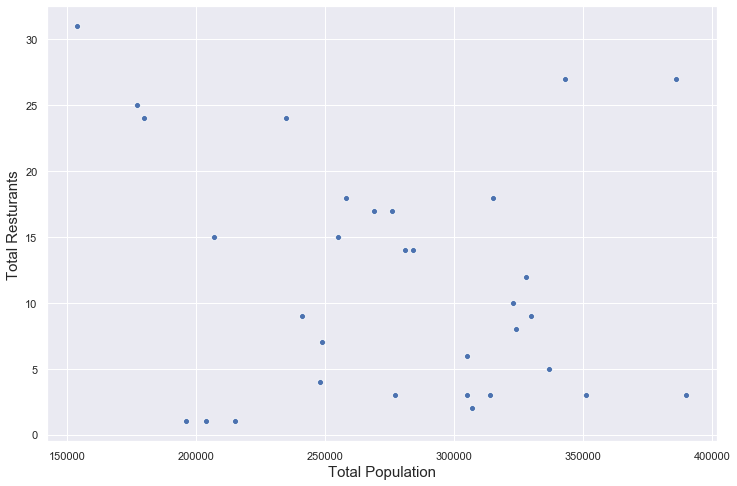

In [49]:
plt.figure(figsize=(12, 8))
ax1 = sns.scatterplot(x = 'Total_Population', y = 'Total_Res', data = Neigh_res)
ax1.set_xlabel("Total Population",fontsize=15)
ax1.set_ylabel("Total Resturants",fontsize=15)


Text(0, 0.5, 'Total Resturants')

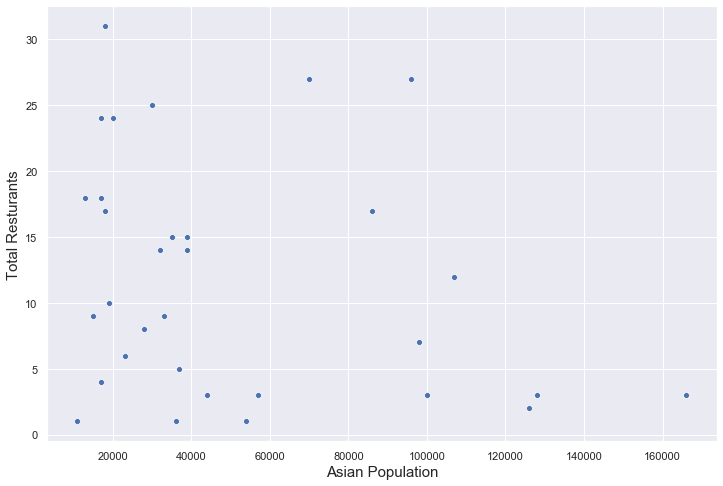

In [50]:
plt.figure(figsize=(12, 8))
ax2= sns.scatterplot(x = 'Asian_Population', y = 'Total_Res', data = Neigh_res)
ax2.set_xlabel("Asian Population",fontsize=15)
ax2.set_ylabel("Total Resturants",fontsize=15)


Text(0, 0.5, 'Asian Resturants')

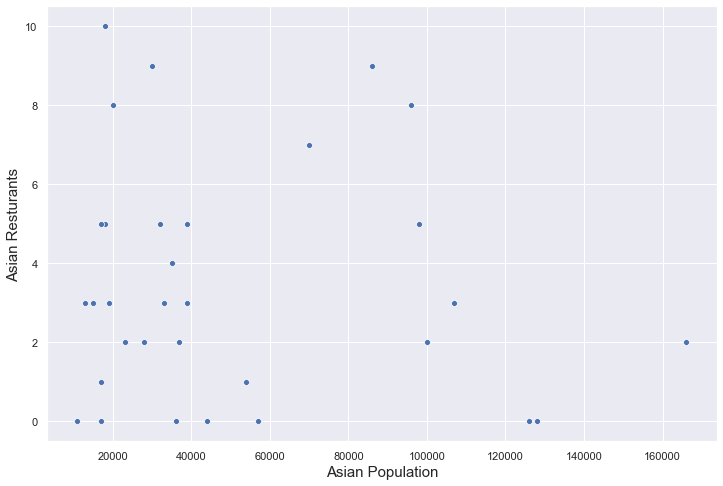

In [51]:
plt.figure(figsize=(12, 8))
ax3 = sns.scatterplot(x = 'Asian_Population', y = 'Asian_Res', data = Neigh_res)
ax3.set_xlabel("Asian Population",fontsize=15)
ax3.set_ylabel("Asian Resturants",fontsize=15)

### K-means clustering

In [52]:
XAN = Neigh_res[['Neighborhood','Asian_Res','Asian_Population']]
XA = Neigh_res[['Asian_Res','Asian_Population']]

XA.head()

,Asian_Res,Asian_Population
0,1,54000
1,0,57000
2,0,17000
3,3,107000
4,3,15000


In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
XA = StandardScaler().fit_transform(XA)

In [55]:
XA[0:5]

array([[-0.82717019,  0.07703986],
       [-1.16652207,  0.15174518],
       [-1.16652207, -0.84432576],
       [-0.14846644,  1.39683387],
       [-0.14846644, -0.89412931]])

In [56]:
kmeans = KMeans(3)

In [57]:
kmeans.fit(XA)

KMeans(n_clusters=3)

In [58]:
identified_clusters = kmeans.fit_predict(XA)
identified_clusters

array([0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0])

In [59]:
data_with_clusters = XAN.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters.head()

,Neighborhood,Asian_Res,Asian_Population,Cluster
0,Barking and Dagenham,1,54000,0
1,Barnet,0,57000,0
2,Bexley,0,17000,0
3,Brent,3,107000,2
4,Bromley,3,15000,0


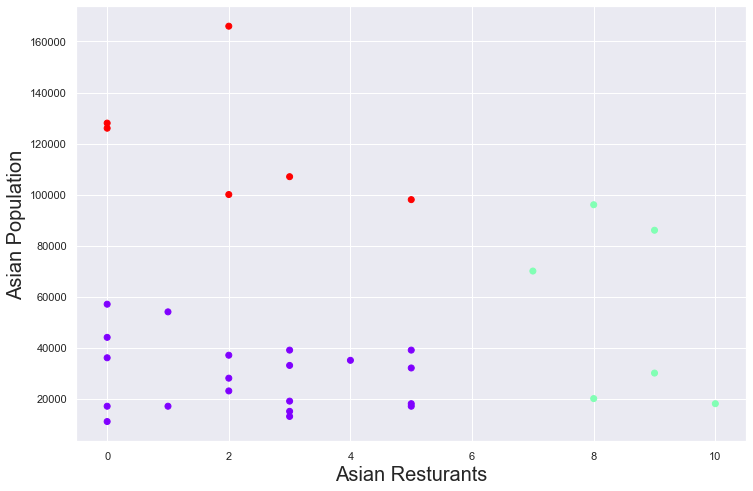

In [60]:
plt.figure(figsize=(12, 8))
plt.scatter(data_with_clusters['Asian_Res'],data_with_clusters['Asian_Population'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlabel("Asian Resturants",fontsize=20)
plt.ylabel("Asian Population",fontsize=20)
plt.show()

### Depending Upon Above Cluster We can define venues in 3 Categories
1. Low Number of Restaurants, Low Population
2. High Number of Restaurants, Low Population
3. Low Number of Restaurants, High Population

We will target 3rd type of Venue as over Desired Places

In [61]:
data_with_clusters.insert(loc = 4,column='latitudes', value=latitudes)
data_with_clusters.insert(loc = 5,column='longitudes', value=longitudes)

In [62]:
data_with_clusters.head()

,Neighborhood,Asian_Res,Asian_Population,Cluster,latitudes,longitudes
0,Barking and Dagenham,1,54000,0,51.554117,0.150504
1,Barnet,0,57000,0,51.653090,-0.200226
2,Bexley,0,17000,0,51.441679,0.150488
3,Brent,3,107000,2,51.563826,-0.275760
4,Bromley,3,15000,0,51.402805,0.014814


In [63]:
m = data_with_clusters['Asian_Population'].max()

In [64]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)
kclusters = 3
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,r,res in zip(data_with_clusters['latitudes'], data_with_clusters['longitudes'], 
                                  data_with_clusters['Neighborhood'], data_with_clusters['Cluster'],
                                data_with_clusters['Asian_Population'], data_with_clusters['Asian_Res']):
    label = folium.Popup(str(poi) + ', ' + str(r) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=r/((10+res)*400),
        popup=label,
        color=cluster,
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### On my Analysis the most suitable area that found to be most suitable for opening an Asian restaurant will be corresponding to cluster number 2

In [65]:
data_with_clusters[data_with_clusters['Cluster'] == 2 ]

,Neighborhood,Asian_Res,Asian_Population,Cluster,latitudes,longitudes
3,Brent,3,107000,2,51.563826,-0.275760
13,Harrow,5,98000,2,51.596769,-0.337275
15,Hillingdon,2,100000,2,51.542519,-0.448335
23,Newham,2,166000,2,51.530000,0.029318
24,Redbridge,0,126000,2,51.576320,0.045410
28,Tower Hamlets,0,128000,2,51.525629,-0.033585


### Finding Top Resturant Venues in Each Neighbourhood

In [66]:
london_g = london_onehot.groupby('Neighborhood').mean().reset_index()
london_grouped = london_g[['Neighborhood'] + All_res]
london_grouped.head()

,Neighborhood,Indian Restaurant,Korean Restaurant,Brazilian Restaurant,Sri Lankan Restaurant,Asian Restaurant,English Restaurant,Caribbean Restaurant,Sushi Restaurant,Japanese Restaurant,...,Malay Restaurant,Austrian Restaurant,Filipino Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Mexican Restaurant,Seafood Restaurant,Taiwanese Restaurant,South Indian Restaurant,Middle Eastern Restaurant
0,Barking and Dagenham,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.058824,0.000000,0.000000,0.0,0.0,0.0
1,Barnet,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,Bexley,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,Brent,0.026316,0.0,0.013158,0.0,0.013158,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.013158,0.0,0.0,0.0
4,Bromley,0.035714,0.0,0.000000,0.0,0.017857,0.017857,0.0,0.017857,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.017857,0.000000,0.0,0.0,0.0


In [67]:
num_top_venues = 5

for hood in london_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = london_grouped[london_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
                   venue  freq
0     Chinese Restaurant  0.06
1      Indian Restaurant  0.00
2       Tapas Restaurant  0.00
3        Thai Restaurant  0.00
4  Vietnamese Restaurant  0.00


----Barnet----
                   venue  freq
0             Restaurant  0.04
1     Italian Restaurant  0.04
2   Fast Food Restaurant  0.04
3        Thai Restaurant  0.00
4  Vietnamese Restaurant  0.00


----Bexley----
                  venue  freq
0  Fast Food Restaurant  0.18
1    Italian Restaurant  0.09
2      Greek Restaurant  0.09
3     Indian Restaurant  0.00
4       Thai Restaurant  0.00


----Brent----
                       venue  freq
0          Indian Restaurant  0.03
1        American Restaurant  0.03
2         Italian Restaurant  0.03
3  Latin American Restaurant  0.01
4         Seafood Restaurant  0.01


----Bromley----
                venue  freq
0   Indian Restaurant  0.04
1    Asian Restaurant  0.02
2  English Restaurant  0.02
3    Sushi Restaurant  0.02
4

In [68]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [69]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = london_grouped['Neighborhood']

for ind in np.arange(london_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Chinese Restaurant,Middle Eastern Restaurant,Ethiopian Restaurant,German Restaurant,Afghan Restaurant,Ramen Restaurant,French Restaurant,Turkish Restaurant,Falafel Restaurant,Argentinian Restaurant
1,Barnet,Restaurant,Italian Restaurant,Fast Food Restaurant,Latin American Restaurant,German Restaurant,Afghan Restaurant,Ramen Restaurant,French Restaurant,Turkish Restaurant,Falafel Restaurant
2,Bexley,Fast Food Restaurant,Greek Restaurant,Italian Restaurant,Middle Eastern Restaurant,Latin American Restaurant,Afghan Restaurant,Ramen Restaurant,French Restaurant,Turkish Restaurant,Falafel Restaurant
3,Brent,Indian Restaurant,Italian Restaurant,American Restaurant,Fast Food Restaurant,Brazilian Restaurant,Asian Restaurant,Latin American Restaurant,Restaurant,Seafood Restaurant,Austrian Restaurant
4,Bromley,Indian Restaurant,Mexican Restaurant,Asian Restaurant,English Restaurant,Turkish Restaurant,Sushi Restaurant,Portuguese Restaurant,Fast Food Restaurant,Latin American Restaurant,Afghan Restaurant


In [70]:
neighborhoods_venues_sorted.tail()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,Sutton,Italian Restaurant,Middle Eastern Restaurant,Empanada Restaurant,German Restaurant,Afghan Restaurant,Ramen Restaurant,French Restaurant,Turkish Restaurant,Falafel Restaurant,Argentinian Restaurant
28,Tower Hamlets,Restaurant,Persian Restaurant,Italian Restaurant,Latin American Restaurant,German Restaurant,Afghan Restaurant,Ramen Restaurant,French Restaurant,Turkish Restaurant,Falafel Restaurant
29,Waltham Forest,Turkish Restaurant,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant,Latin American Restaurant,German Restaurant,Afghan Restaurant,Ramen Restaurant,French Restaurant,Falafel Restaurant,Argentinian Restaurant
30,Wandsworth,Italian Restaurant,Restaurant,Portuguese Restaurant,Asian Restaurant,Greek Restaurant,Thai Restaurant,Modern European Restaurant,Lebanese Restaurant,Indian Restaurant,Malay Restaurant
31,Westminster,Indian Restaurant,French Restaurant,Italian Restaurant,Sushi Restaurant,Japanese Restaurant,Restaurant,Cajun / Creole Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Turkish Restaurant


## Clustering All Restaurant Venues in London

In [71]:
kclusters = 5

london_grouped_cluster = london_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 2, 1, 4, 1, 1, 1, 4, 1])

In [72]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

london_merged = df_london.drop(['White','Black','Mixed','Asian_Population'], axis= 1)

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
london_merged = london_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

london_merged.head()

,Neighborhood,Total_Population,latitudes,longitudes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,215000.0,51.554117,0.150504,1,Chinese Restaurant,Middle Eastern Restaurant,Ethiopian Restaurant,German Restaurant,Afghan Restaurant,Ramen Restaurant,French Restaurant,Turkish Restaurant,Falafel Restaurant,Argentinian Restaurant
1,Barnet,390000.0,51.653090,-0.200226,1,Restaurant,Italian Restaurant,Fast Food Restaurant,Latin American Restaurant,German Restaurant,Afghan Restaurant,Ramen Restaurant,French Restaurant,Turkish Restaurant,Falafel Restaurant
2,Bexley,248000.0,51.441679,0.150488,2,Fast Food Restaurant,Greek Restaurant,Italian Restaurant,Middle Eastern Restaurant,Latin American Restaurant,Afghan Restaurant,Ramen Restaurant,French Restaurant,Turkish Restaurant,Falafel Restaurant
3,Brent,328000.0,51.563826,-0.275760,1,Indian Restaurant,Italian Restaurant,American Restaurant,Fast Food Restaurant,Brazilian Restaurant,Asian Restaurant,Latin American Restaurant,Restaurant,Seafood Restaurant,Austrian Restaurant
4,Bromley,330000.0,51.402805,0.014814,4,Indian Restaurant,Mexican Restaurant,Asian Restaurant,English Restaurant,Turkish Restaurant,Sushi Restaurant,Portuguese Restaurant,Fast Food Restaurant,Latin American Restaurant,Afghan Restaurant


In [73]:
london_merged.head()

,Neighborhood,Total_Population,latitudes,longitudes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,215000.0,51.554117,0.150504,1,Chinese Restaurant,Middle Eastern Restaurant,Ethiopian Restaurant,German Restaurant,Afghan Restaurant,Ramen Restaurant,French Restaurant,Turkish Restaurant,Falafel Restaurant,Argentinian Restaurant
1,Barnet,390000.0,51.653090,-0.200226,1,Restaurant,Italian Restaurant,Fast Food Restaurant,Latin American Restaurant,German Restaurant,Afghan Restaurant,Ramen Restaurant,French Restaurant,Turkish Restaurant,Falafel Restaurant
2,Bexley,248000.0,51.441679,0.150488,2,Fast Food Restaurant,Greek Restaurant,Italian Restaurant,Middle Eastern Restaurant,Latin American Restaurant,Afghan Restaurant,Ramen Restaurant,French Restaurant,Turkish Restaurant,Falafel Restaurant
3,Brent,328000.0,51.563826,-0.275760,1,Indian Restaurant,Italian Restaurant,American Restaurant,Fast Food Restaurant,Brazilian Restaurant,Asian Restaurant,Latin American Restaurant,Restaurant,Seafood Restaurant,Austrian Restaurant
4,Bromley,330000.0,51.402805,0.014814,4,Indian Restaurant,Mexican Restaurant,Asian Restaurant,English Restaurant,Turkish Restaurant,Sushi Restaurant,Portuguese Restaurant,Fast Food Restaurant,Latin American Restaurant,Afghan Restaurant


In [74]:
london_merged.shape

(32, 15)

In [75]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,r in zip(london_merged['latitudes'], london_merged['longitudes'], 
                                  london_merged['Neighborhood'], london_merged['Cluster Labels'], df_london['Total_Population']):
    label = folium.Popup(str(poi) + ', ' + str(r) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=r/22000,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [76]:
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Total_Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,249000.0,Indian Restaurant,Fast Food Restaurant,Afghan Restaurant,Thai Restaurant,Latin American Restaurant,Ramen Restaurant,French Restaurant,Turkish Restaurant,Falafel Restaurant,Argentinian Restaurant


In [77]:
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Total_Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,215000.0,Chinese Restaurant,Middle Eastern Restaurant,Ethiopian Restaurant,German Restaurant,Afghan Restaurant,Ramen Restaurant,French Restaurant,Turkish Restaurant,Falafel Restaurant,Argentinian Restaurant
1,390000.0,Restaurant,Italian Restaurant,Fast Food Restaurant,Latin American Restaurant,German Restaurant,Afghan Restaurant,Ramen Restaurant,French Restaurant,Turkish Restaurant,Falafel Restaurant
3,328000.0,Indian Restaurant,Italian Restaurant,American Restaurant,Fast Food Restaurant,Brazilian Restaurant,Asian Restaurant,Latin American Restaurant,Restaurant,Seafood Restaurant,Austrian Restaurant
5,255000.0,Italian Restaurant,Vegetarian / Vegan Restaurant,Portuguese Restaurant,Greek Restaurant,French Restaurant,Falafel Restaurant,Argentinian Restaurant,Modern European Restaurant,Japanese Restaurant,Middle Eastern Restaurant
6,386000.0,Italian Restaurant,Mediterranean Restaurant,Indian Restaurant,Fast Food Restaurant,Asian Restaurant,Sushi Restaurant,Portuguese Restaurant,Korean Restaurant,Caribbean Restaurant,French Restaurant
7,343000.0,Italian Restaurant,Thai Restaurant,Indian Restaurant,Greek Restaurant,Persian Restaurant,Vietnamese Restaurant,Polish Restaurant,Asian Restaurant,English Restaurant,Caribbean Restaurant
9,284000.0,Indian Restaurant,Turkish Restaurant,Mediterranean Restaurant,English Restaurant,Sushi Restaurant,Japanese Restaurant,Italian Restaurant,French Restaurant,South Indian Restaurant,Thai Restaurant
10,281000.0,Vietnamese Restaurant,Modern European Restaurant,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant,Caribbean Restaurant,Ethiopian Restaurant,Italian Restaurant,Ramen Restaurant,Restaurant,Taiwanese Restaurant
11,180000.0,Italian Restaurant,Thai Restaurant,Indian Restaurant,Japanese Restaurant,French Restaurant,Turkish Restaurant,Tapas Restaurant,Vegetarian / Vegan Restaurant,Portuguese Restaurant,Fast Food Restaurant
14,258000.0,Italian Restaurant,Vegetarian / Vegan Restaurant,Portuguese Restaurant,French Restaurant,Greek Restaurant,Falafel Restaurant,Vietnamese Restaurant,Modern European Restaurant,Ethiopian Restaurant,Middle Eastern Restaurant


In [78]:
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Total_Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,248000.0,Fast Food Restaurant,Greek Restaurant,Italian Restaurant,Middle Eastern Restaurant,Latin American Restaurant,Afghan Restaurant,Ramen Restaurant,French Restaurant,Turkish Restaurant,Falafel Restaurant


In [79]:
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Total_Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,305000.0,Chinese Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Ethiopian Restaurant,Afghan Restaurant,Ramen Restaurant,French Restaurant,Turkish Restaurant,Falafel Restaurant,Argentinian Restaurant


In [80]:
london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Total_Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,330000.0,Indian Restaurant,Mexican Restaurant,Asian Restaurant,English Restaurant,Turkish Restaurant,Sushi Restaurant,Portuguese Restaurant,Fast Food Restaurant,Latin American Restaurant,Afghan Restaurant
8,337000.0,Indian Restaurant,Turkish Restaurant,Portuguese Restaurant,Fast Food Restaurant,Ethiopian Restaurant,Afghan Restaurant,Ramen Restaurant,French Restaurant,Falafel Restaurant,Argentinian Restaurant
12,276000.0,Turkish Restaurant,Fast Food Restaurant,Indian Restaurant,Mediterranean Restaurant,Greek Restaurant,Chinese Restaurant,South Indian Restaurant,Portuguese Restaurant,Italian Restaurant,French Restaurant
16,269000.0,Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,Asian Restaurant,Portuguese Restaurant,Restaurant,Cajun / Creole Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,Turkish Restaurant
21,305000.0,Restaurant,Fast Food Restaurant,Sri Lankan Restaurant,Turkish Restaurant,Indian Restaurant,Chinese Restaurant,Cajun / Creole Restaurant,Ramen Restaurant,French Restaurant,Seafood Restaurant
23,351000.0,Indian Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Latin American Restaurant,Afghan Restaurant,Ramen Restaurant,French Restaurant,Turkish Restaurant,Falafel Restaurant,Argentinian Restaurant
29,277000.0,Turkish Restaurant,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant,Latin American Restaurant,German Restaurant,Afghan Restaurant,Ramen Restaurant,French Restaurant,Falafel Restaurant,Argentinian Restaurant
